Image dimensions: 350x350 pixels
Max-tree build time: 0.012771s
Number of max-tree nodes: 14312
Number of max-tree leaves: 5150


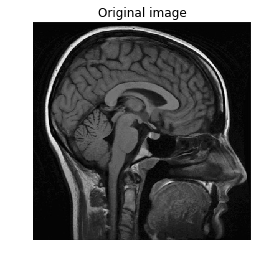

In [1]:
# This makes plots appear in the notebook
%matplotlib inline 

import numpy as np # numpy is the major library in which siamxt was built upon
                   # we like the array programming style =)

# We are using PIL to read images     
from PIL import Image

# and matplotlib to display images
import matplotlib.pyplot as plt

import time # Let's measure some processing times

import siamxt  

# Loading the image.
# Make sure the image you read is either uint8 or uint16
# img = np.asarray(Image.open("./Sample-images/OpenCV_Logo.png").convert('L'))
# img = np.asarray(Image.open("./Sample-images/Microsoft_logo.png").convert('L'))
# img = np.asarray(Image.open("./Sample-images/Google_G_Logo.png").convert('L'))
# img = np.asarray(Image.open("./Sample-images/OpenCV_Logo_with_text.png").convert('L'))
# img = np.asarray(Image.open("Sample-images/Google_G_Logo.bmp"))
# img = np.asarray(Image.open("Sample-images/brain_coronal.png"))
# img = np.asarray(Image.open("test/test1.bmp"))
# img = np.asarray(Image.open("./Triesch/bfritza1.pgm"))

img = np.asarray(Image.open("Sample-images/brain_mr.bmp"))

print("Image dimensions: %dx%d pixels" %img.shape)

#Displaying the image.convert('L')
fig = plt.figure()
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.title("Original image")


#Structuring element with connectivity-8
Bc = np.ones((3,3),dtype = bool)

t = time.time()
#Building the max-tree with the connectivity defined
mxt = siamxt.MaxTreeAlpha(img,Bc)
t = time.time() -t

print("Max-tree build time: %fs" %t)
print("Number of max-tree nodes: %d" %mxt.node_array.shape[1])
print("Number of max-tree leaves: %d" %(mxt.node_array[1,:] == 0).sum())

Number of max-tree nodes: 614
Number of max-tree leaves: 8


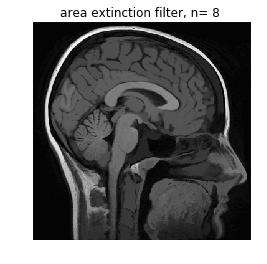

In [2]:
# Number of leaves to be preserved
n = 8

# img_neg = (img.max() - img)
# mxt_f2 = siamxt.MaxTreeAlpha(img_neg, Bc)

mxt_f2 = mxt.clone()

# Select the area attribute of the max-tree nodes from NA
area = mxt_f2.node_array[3,:]

# Computes the area extinction values
area_ext = mxt_f2.computeExtinctionValues(area,"area")
# h_ext = mxt_f2.computeExtinctionValues(mxt.computeHeight(), "height")

# Applies the  area extinction filter
mxt_f2.extinctionFilter(area_ext,n)
# mxt_f2.extinctionFilter(h_ext, n)

#Recovering the image 
img_filtered2 =  mxt_f2.getImage()

# Negating the image back
# img_f2 = img_max -img_filtered2

#Displaying the filtered image
fig = plt.figure()
plt.imshow(img_filtered2, cmap='Greys_r')
plt.axis('off')
plt.title("area extinction filter, n= %d " %n)
print("Number of max-tree nodes: %d" %mxt_f2.node_array.shape[1])
print("Number of max-tree leaves: %d" %(mxt_f2.node_array[1,:] == 0).sum())

Number of max-tree nodes: 16
Number of max-tree leaves: 8


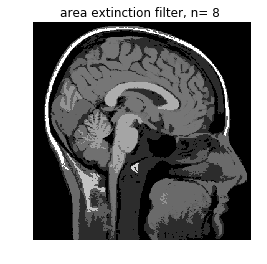

In [3]:
mxt_f2.mmsT()
#Recovering the image 
img_filtered2 =  mxt_f2.getImage()

# Negating the image back
# img_f2 = img_max -img_filtered2

#Displaying the filtered image
fig = plt.figure()
plt.imshow(img_filtered2, cmap='Greys_r')
plt.axis('off')
plt.title("area extinction filter, n= %d " %n)
print("Number of max-tree nodes: %d" %mxt_f2.node_array.shape[1])
print("Number of max-tree leaves: %d" %(mxt_f2.node_array[1,:] == 0).sum())

In [4]:
mxt_f2.generateCCGraph(parent_scale=True, file_name='graph_brain_mr')

Text(0.5, 1.0, 'Max-tree after the MMS methodology')

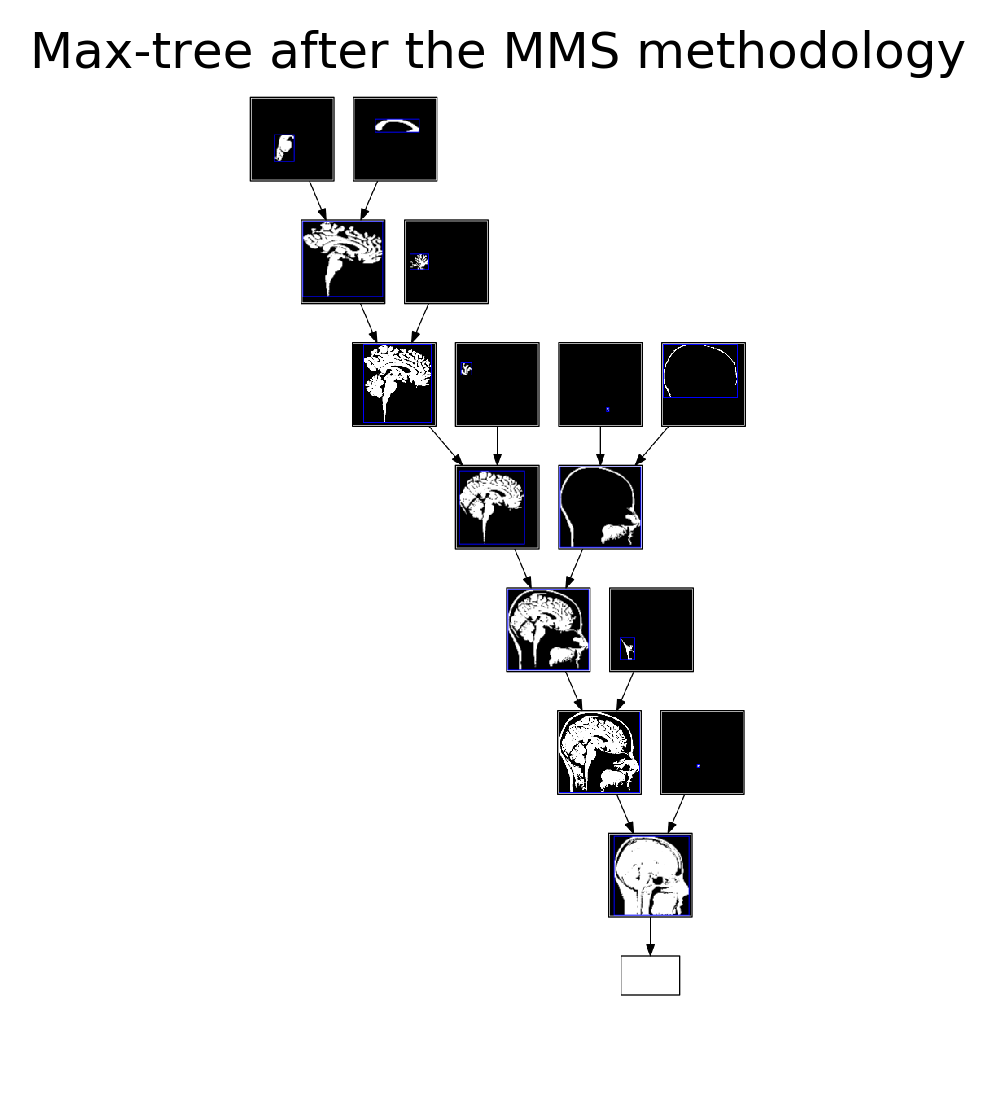

In [7]:
tree_graph = img = np.asarray(Image.open("graph_brain_mr.png"))
fig = plt.figure(dpi=300)
plt.imshow(tree_graph, cmap='Greys_r')
plt.axis('off')
# plt.title('Max-tree after the MMS methodology')

In [9]:
import gvgen
mmgraphviz(g, title='Max-tree')

NameError: name 'mmgraphviz' is not defined